In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 

In [3]:
#obtain data from website

In [6]:
#format data into weeks, defence, and fantacy points
trainingExample = np.array([[0,5,10],[1,3,7],[2,15,20],[3,23,27],[4,2,3],[5,19,25]])
testingExample = np.array([[0,4,11],[1,5,8],[2,13,15],[3,17,20],[4,1,2],[5,17,22]])
datapoints = []
print(datapoints)
print(trainingExample)
trainingsubset=trainingExample[:2,:5]
print(trainingsubset)

[]
[[ 0  5 10]
 [ 1  3  7]
 [ 2 15 20]
 [ 3 23 27]
 [ 4  2  3]
 [ 5 19 25]]
[[ 0  5 10]
 [ 1  3  7]]


In [62]:
#function to format data into data points
def makeDataPoints(data):
    newDataPoints=np.empty([len(data)-1,12])
    newTargets=np.empty([len(data)-1,1])
    for g in range(len(data)):
        datapoint = 0
        d0,fp0 =data[g,1], data[g,2]
        if g == 1:
            d1,fp1=data[g-1,1], data[g-1,2]
            datapoint=np.array([g,d0,d1,fp1,d1,fp1,d1,fp1,d1,fp1,d1,fp1])
        if g == 2:
            d1,fp1=data[g-1,1], data[g-1,2]
            d2,fp2=data[g-2,1], data[g-2,2]
            datapoint=np.array([g,d0,d1,fp1,d1,fp1,d1,fp1,d1,fp1,d2,fp2])
        if g == 3:
            d1,fp1=data[g-1,1], data[g-1,2]
            d2,fp2=data[g-2,1], data[g-2,2]
            d3,fp3=data[g-3,1], data[g-3,2]
            datapoint=np.array([g,d0,d1,fp1,d1,fp1,d1,fp1,d2,fp2,d3,fp3])
        if g == 4:
            d1,fp1=data[g-1,1], data[g-1,2]
            d2,fp2=data[g-2,1], data[g-2,2]
            d3,fp3=data[g-3,1], data[g-3,2]
            d4,fp4=data[g-4,1], data[g-4,2]
            datapoint=np.array([g,d0,d1,fp1,d1,fp1,d2,fp2,d3,fp3,d4,fp4])
        if g >= 5:
            d1,fp1=data[g-1,1], data[g-1,2]
            d2,fp2=data[g-2,1], data[g-2,2]
            d3,fp3=data[g-3,1], data[g-3,2]
            d4,fp4=data[g-4,1], data[g-4,2]
            d5,fp5=data[g-5,1], data[g-5,2]
            datapoint=np.array([g,d0,d1,fp1,d2,fp2,d3,fp3,d4,fp4,d5,fp5])
        newTargets[g-1]=fp0
        newDataPoints[g-1]=datapoint
    return newDataPoints, newTargets
makeDataPoints(trainingExample)

(array([[ 1.,  3.,  5., 10.,  5., 10.,  5., 10.,  5., 10.,  5., 10.],
        [ 2., 15.,  3.,  7.,  3.,  7.,  3.,  7.,  3.,  7.,  5., 10.],
        [ 3., 23., 15., 20., 15., 20., 15., 20.,  3.,  7.,  5., 10.],
        [ 4.,  2., 23., 27., 23., 27., 15., 20.,  3.,  7.,  5., 10.],
        [ 5., 19.,  2.,  3., 23., 27., 15., 20.,  3.,  7.,  5., 10.]]),
 array([[ 7.],
        [20.],
        [27.],
        [ 3.],
        [25.]]))

In [63]:
#format 2002-2018 into training data points

In [64]:
#format 2019 into testing data points

In [65]:
#Train regression to get weights and bias
#weightsAndBias = LinearRegression().fit(X_train, Y_train)
training_X,training_Y=makeDataPoints(trainingExample)#replace with 2002-2018 datapoints
testing_X,testing_Y=makeDataPoints(testingExample)#replace with 2019 datapoints
weightsAndBias = LinearRegression().fit(training_X,training_Y)
w = weightsAndBias.coef_
b = weightsAndBias.intercept_
print(w, b)

[[ 0.0246618   1.02655186 -0.10209197 -0.09916772 -0.06742029 -0.05954295
   0.12267215  0.10678794 -0.06265653 -0.0939848   0.          0.        ]] [5.90224107]


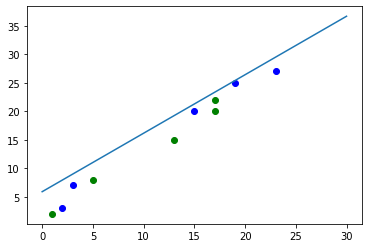

In [56]:
plt.scatter(training_X[:,1],training_Y,c="blue")
plt.scatter(testing_X[:,1],testing_Y,c="green")
X_range = np.linspace(0,30,30)
Y_range = (b + w[:,1]*X_range)
plt.plot(X_range,Y_range)

In [61]:
def regression_error(x, y, w, b):
    regression_error = 0
    for i in range(len(x)):
        # TODO: ******** To be filled ********
        # prediction based on x 
        yhat=w.transpose().dot(x[i])+b
        # regression error, doing the sum 
        regression_error=regression_error+((yhat-y[i])**2)
    # calculate the mean and square root 
    regression_error=(regression_error/len(x))**(1/2)
    return regression_error

w2 = np.squeeze(np.asarray(w))
print('Training regression errors are:')
print(regression_error(training_X, training_Y, w2, b2))
print('Testing regression errors are:')
print(regression_error(testing_X, testing_Y, w2, b))

Training regression errors are:
[1.12504548e-14]
Testing regression errors are:
[1.47033572]
